(chap:5b-accounting)=
# 成長会計

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [1]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py4macro

# numpy v1の表示を使用
np.set_printoptions(legacy='1.21')
# 警告メッセージを非表示
import warnings
warnings.filterwarnings("ignore")

## はじめに

この章では次の問を考える。

> （問２）なぜ国々の経済成長率は大きく異なるのか？

この問を**成長会計**と呼ばれる手法を使って考察する。この手法も発展会計と同様に，一人当たりGDPの**変化率**（即ち、経済成長率）を全要素生産性と蓄積生産要素に分解し、それぞれの寄与度を考察することにより問２の「なぜ」を考える。

## 成長率について

$t$時点の生産関数を

$$
y_t=A_tk_t^a\left(h_tH_t\right)^{1-a}
$$

としよう。$t$時点と$t+1$時点の生産関数を使うと

$$
\frac{y_{t+1}}{y_t}=\frac{A_{t+1}}{A_t}
\left(\frac{k_{t+1}}{k_t}\right)^a
\left(\frac{h_{t+1}H_{t+1}}{h_tH_t}\right)^{1-a}
$$

となる。ここで

$$
1+g_x\equiv\frac{x_{t+1}}{x_t}
$$

とすると，$g_x$は$x$の成長率（例えば、0.02）である。これにより、

$$
1+g_y=(1+g_A)(1+g_k)^a\left[(1+g_h)(1+g_H)\right]^{1-a}
$$

となり、対数化すると

$$
\log(1+g_y)=\log(1+g_A)+a\log(1+g_k)+(1-a)\left[\log(1+g_h)+\log(1+g_H)\right]
$$

となる。また成長率が十分に小さい場合（例えば、0.02）、次式で近似することが可能となる。

$$
\log(1+g_x)\approx g_x
$$
(eq:gx_approx)

In [2]:
np.log( 1+0.02 )

0.01980262729617973

即ち、

$$
g_y=g_A+ag_k+(1-a)(g_h+g_H)
$$
(eq:5-growth-of-y)

となる。

この式に基づき，成長会計，即ち，どの要素がどれだけ一人当たりGDPの成長率に貢献しているかを計算することになる。

次に変数の平均成長率の計算方法を説明する。ある変数$x$が毎年$g_x$の率（例えば，`0.02`）で$n$年間成長したとしよう。初期の$x=x_0$に対する$n$年後の比率を考えると，次式が成立する。

$$
\frac{x_{n}}{x_{0}}=
\frac{x_1}{x_{0}}\cdot
\frac{x_2}{x_{1}}\cdot
\frac{x_3}{x_{2}}\cdot
\cdots
\frac{x_{n-2}}{x_{n-3}}\cdot
\frac{x_{n-1}}{x_{n-2}}\cdot
\frac{x_n}{x_{n-1}}
=(1+g_x)^{n}
$$
(eq:5-growth_average-expanded)

$g_x$は一定なので$g_x$は年間平均成長率と等しい。このことを踏まえ[](eq:5-growth_average-expanded)の両辺を$1/n$乗すると次式となる。

$$
\left(\frac{x_n}{x_0}\right)^{\frac{1}{n}}=1+g_x
$$

即ち，$1+g_x$は$\dfrac{x_n}{x_0}$の幾何平均であり，平均成長率$g_x$はこの式を使い計算できる。

$$
g_x=
\left(
\dfrac{x_{n}}{x_{0}}
\right)^{\frac{1}{n}}-1
$$
(eq:5-growth_average)

この場合，算術平均ではなく**幾何平均**を使うことに注意しよう。また**毎期毎期の成長率が違っても同じ結果[](eq:5-growth_average)が成立する**ことも覚えておこう。

更に，年間平均成長率を計算する場合，[](eq:5-growth_average-expanded)の両辺を対数化し式[](eq:gx_approx)の近似を使うこともできる。

$$
\begin{align*}
\ln\left(\frac{x_n}{x_0}\right)
&=\ln\left(1+g_x\right)^n \\
&\Downarrow
\end{align*}
$$

$$
g_x\approx\frac{1}{n}\ln\left(\frac{x_n}{x_0}\right)
$$
(eq:5-growth_average-2)

$g_x$が十分に小さい場合は，[](eq:5-growth_average)と[](eq:5-growth_average-2)のどちらを使っても大きな差は出ない。重要な点は，どちらかの一つの方法を計算の対象全てに一貫して使うことであり，以下では[式](eq:5-growth-of-y)と[式](eq:5-growth_average-2)を使って計算する。

例：$x_0=10$，$x_n=30$，$n=50$

In [3]:
x0 = 10
xn = 30
n  = 50

houhou1 = ( xn / x0 )**(1/n) - 1
houhou2 = ( np.log(xn) - np.log(x0) ) / n

print(f'方法１：{houhou1:}\n方法２：{houhou2}')

方法１：0.022215413278477092
方法２：0.02197224577336219


```{admonition} コードの説明
:class: dropdown

* `f`は以前説明した`f-string`である。`houhou1`と`houhou2`にそれぞれの値を代入している。
* `\n`は改行を意味する。
```

## 平均成長率の計算

まずPenn World Tableを読み込み，国のリストを作成しよう

In [4]:
df = py4macro.data('pwt')

country_lst = df.loc[:,'country'].unique()

データに含まれる次の変数を使う。
* `rgdpna`：実質GDP
    * 経済成長を考える上で適している
* `emp`：雇用者数
* `rkna`：物的資本サービス
* `hc`：人的資本の指標
    * 教育年数と教育の収益から計算されている

以下で計算する変数とは次のように対応している。
* 一人当たりGDP：$y_i\equiv\dfrac{Y_i}{L_i}=$ `rgdpna`/`emp`
* 一人当たり資本：$k_i\equiv\dfrac{K_i}{L_i}=$ `rkna`/`emp`
* 労働者一人当たり人的資本サービス：$h_iH_i=$ `avh`x`hc`
* 資本の所得シャア：$\alpha=1/3$（仮定）
* 蓄積生産要素：$k_i^{\alpha}\left(h_iH_i\right)^{1-\alpha}$
* 全要素生産性：$A_i=\dfrac{y_i}{k_i^{\alpha}\left(h_iH_i\right)^{1-\alpha}}$

それぞれの変数を計算しよう。

In [5]:
# 資本の所得シャア
a=1/3.0

# 一人当たりGDP
df['y'] = df['rgdpna'] / df['emp']

# 資本割合

df['k'] = df['rkna'] / df['emp']

# 蓄積生産要素
df['factors'] = df['k']**a * ( df['avh']*df['hc'] )**(1-a)

# 全要素生産性
df['tfp'] = df['y'] / df['factors']

これらの変数を使い，1999年から2019年の20年間の`y`、`k`、`avh`，`hc`の平均成長率を計算するが，まずそのための準備として関数を作成する。次の`calculate_growth`関数は，`country`（国）の`var`（変数）の平均成長率を返す。

In [6]:
def calculate_growth(country, var, start=1999, end=2019, df=df):

    """
    引数：
        country: 国名（文字列; 例えば，'Japan'）
        var: 変数名（文字列; 例えば，`y`）
    戻り値：
        `country`における`var`の平均成長率（浮動小数点型）
    """

    t = end - start                          #1

    cond1 = ( df.loc[:,'country']==country ) #2
    cond2 = ( df.loc[:,'year']==start )      #3
    cond3 = ( df.loc[:,'year']==end )        #4

    cond_start = ( cond1 & cond2 )           #5
    cond_end = ( cond1 & cond3 )             #6

    df_start = df.loc[cond_start,:]          #7
    df_end = df.loc[cond_end,:]              #8

    g = (1/t) * np.log( df_end[var].iloc[0] / df_start[var].iloc[0] ) #9
    
    return 100 * g   #10

```{admonition} コードの説明
:class: dropdown

* `#1`：何年間かを計算
* `#2`：国を選択する際の条件であり`#5`と`#6`で使う
* `#3`：最初の年を選択する際の条件であり`#5`で使う
* `#5`：最後の年を選択する際の条件であり``#6`で使う
* `#6`：最初の年と国を選択する際の条件であり`#7`で`df_start`を作成する際に使う
* `#7`：最後の年と国を選択する際の条件であり`#8`で`df_end`を作成する際に使う
* `#8`：最初の年の`DataFrame`を抽出
* `#9`：最後の年の`DataFrame`を抽出
* `#10`：平均成長率を計算する。
    * `df_end[var]`と`df_start[var]`は列ラベル`var`の列を抽出しており、`Series`として返される。
    * `.iloc[0]`は`Series`の`0`番目の数値を取り出すメソッド
    * 成長率を計算し`g`に割り当てる。
* `#11`：％表示にして返す
```

例として，日本の一人当たりGDPの平均成長率を計算してみよう。

In [7]:
calculate_growth('Japan','y')

0.6242925604611884

次に，`calculate_growth`関数を使いいっきに全ての国の４つの変数の平均成長率を計算する。`for`ループが二重（入れ子）になっている。

In [8]:
var_lst = ['y','k','avh','hc']   #1

growth_dic = {}             #2

for v in var_lst:           #3
    
    growth_lst = []         #4
    
    for c in country_lst:   #5
        
        g = calculate_growth(c, v)  #6
        
        growth_lst.append(g)        #7
            
    growth_dic[v] = growth_lst      #8

df_growth = pd.DataFrame({'country':country_lst,         #9
                          'y':growth_dic['y'],   #10
                          'k':growth_dic['k'],
                          'avh':growth_dic['avh'],
                          'hc':growth_dic['hc']})

```{admonition} コードの説明
:class: dropdown

* `#1`：成長率を計算する対象となる変数リスト
* `#2`：空の辞書。次の形になるように(1)の平均成長率のリストを格納する。
    * キー：変数名（`y`、`k`、`hc`）
    * 値：それぞれの国の成長率からなるリスト
* `#3`：`var_lst`に対しての`for`ループ。１回目のループでは`y`について計算する。
* `#4`：空リスト（役割は以下で説明）
* `#5`：`country_lst`に対しての`for`ループ。(3)の１回目の`for`ループで変数`y`に対して`country_lst`にある国の成長率を下に続くコードを使って計算する。
* `#6`：`calculate_growth`関数を使い，国`c`の変数`v`の平均成長率を計算し`g`に割り当てる。
* `#7`：計算した成長率を(4)のリストに追加する。
* `#8`：ループが終わると、(4)のリストを(2)の辞書に追加する。
    * 辞書に追加する際に変数名`v`を指定することにより、次のペアのデータが追加される
        * キー：変数名（`y`、`k`、`hc`）
        * 値：それぞれの国の成長率のリスト
    * `#3`の`for`ループの次の変数に移り、3.以下で説明した作業が繰り返される。
* `#9`：`country_lst`を`DataFrame`の列に設定
* `#10`：`y`の成長率を`DataFrame`の列に設定するが，その際，`growth_dic['キー']`で`growth_dic`の`キー`にあるリストを抽出している。
    * 下の３行は`k`，`avh`，`hc`に対して同じ作業を行なっている。
    * 新たに作成される`DataFrame`は変数`df_growth`に割り当てられる。
```

`df_growth`の最初の５行を表示してみよう。

In [9]:
df_growth.head()

,country,y,k,avh,hc
0,Aruba,-0.138284,3.101398,NaN,NaN
1,Angola,1.929675,-0.188248,NaN,0.732205
2,Anguilla,NaN,NaN,NaN,NaN
3,Albania,3.525447,NaN,NaN,0.386450
4,United Arab Emirates,-2.090208,NaN,NaN,0.335412


````{note}
`DataFrame`にはグループ計算用のメソッド`groupby`が備わっており，それを使うとより短いコードで`df_growth`を作成することができる。
```
def calc_growth(x):
    return (1/(len(x)-1))*np.log( x.iloc[-1] / x.iloc[0] )

cond1 = ( 1999 <= df['year'] )
cond2 = ( 2019 >= df['year'] )
cond = cond1 & cond2
df_growth = 100 * df.loc[cond,:].groupby('country')[['y','k','avh','hc']].agg(calc_growth)
```
[ここを参考にしよう。](https://py4basics.github.io/3_Pandas.html#id35)
````

`y`の成長率のヒストグラムをプロットするが，ここでは`DataFrame`のメソッド`plot()`を使う。まず使用する列を選んでメソッド`plot()`の引数に`kind='hist'`を指定するだけである。他の引数：
* `bins=20`：階級（棒）の数を指定する引数（デフォルトは`10`）
* `edgecolor='white'`もしくは`ec='white'`：は棒の枠の色をしてする。ここでは白を使っている。

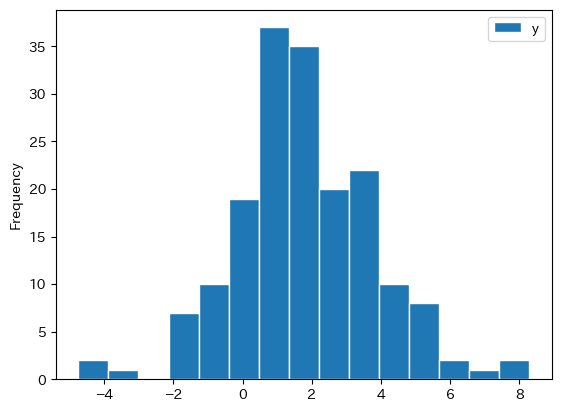

In [10]:
df_growth.plot.hist(y='y', bins=15, edgecolor='white')
pass

多くの国はプラスの経済成長を遂げているが，マイナイス成長の経済も存在する。平均成長率がマイナスの国数を計算してみよう。

In [11]:
cond = ( df_growth.loc[:,'y']<0 )
len(df_growth.loc[cond,:])

29

最も平均成長率が低い経済の国名を探してみよう。

In [12]:
df_growth_sorted = df_growth.sort_values('y')
df_growth_sorted.head()

,country,y,k,avh,hc
176,Venezuela (Bolivarian Republic of),-4.749982,-0.583572,NaN,1.560305
179,Yemen,-4.072836,NaN,NaN,2.328553
130,Oman,-3.330238,-0.217700,NaN,NaN
4,United Arab Emirates,-2.090208,NaN,NaN,0.335412
158,Syrian Arab Republic,-1.849972,NaN,NaN,1.051994


ここで使ったメソッド`sort_values()`は，引数の列を基準に昇順に並べ替える。引数に`ascending=False`を使うと，降順に並び替えることができる。

In [13]:
print( '上のヒストグラムで最も成長率が低い国は'
      f'{df_growth_sorted.iloc[0,0]}である。')

上のヒストグラムで最も成長率が低い国はVenezuela (Bolivarian Republic of)である。


`df_growth_sorted`から分かるように，他の変数には欠損値が含まれているので`NaN`がある行は全て削除する。

In [14]:
df_growth = df_growth.dropna().copy()

残った国数を確認してみよう。

In [15]:
len(df_growth)

60

## 蓄積生産要素の成長率

次に，下の式を使って蓄積生産要素の成長率を計算しよう。

$$
g_{\text{factors}}=ag_k+(1-a)(g_h+g_H)
$$

結果を`df_growth`に追加するが，その際、$a=\dfrac{1}{3}$と仮定する。

In [16]:
df_growth['factors'] = (
    (1/3) * df_growth['k'] +
    (1-1/3) * ( df_growth['avh'] + df_growth['hc'] )
)

`factors`の成長率のヒストグラムを図示する。

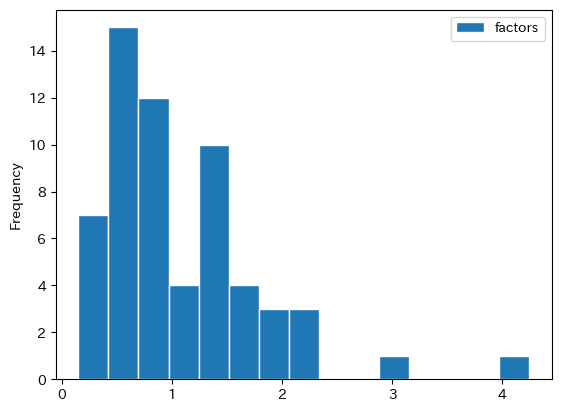

In [17]:
df_growth.plot.hist(y='factors', bins=15, ec='white')
pass

マイナスの成長率の国数を調べてみよう。

In [18]:
cond = ( df_growth.loc[:,'factors']<0 )
len(df_growth.loc[cond,:])

0

## 全要素生産性の成長率

全要素生産性は残差として計算される。

$$
g_A=g_y-g_{\text{factors}}
$$

In [19]:
df_growth['tfp'] = df_growth['y'] - df_growth['factors']

`tfp`の成長率のヒストグラムを図示してみよう。

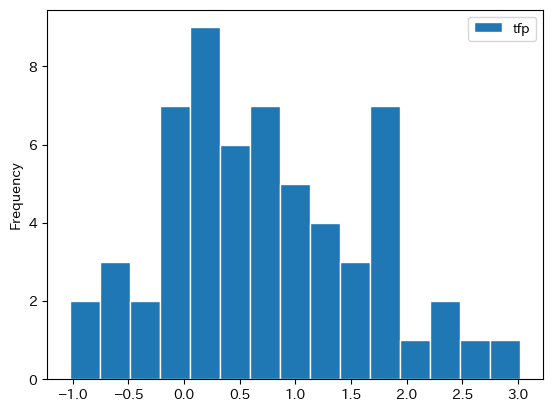

In [20]:
df_growth.plot.hist(y='tfp', bins=15, ec='white')
pass

蓄積生産要素と比べると全要素生産性の成長率はよりマイナスに広がっている。TFP成長率がマイナスの国の数を確認してみよう。

In [21]:
cond = ( df_growth.loc[:,'tfp']<0 )
len(df_growth.loc[cond,:])

13

## 各国の全要素生産性の寄与度

全要素生産性と蓄積生産要素のどちらが成長率に貢献しているのだろうか。まず図を使って比較してみよう。

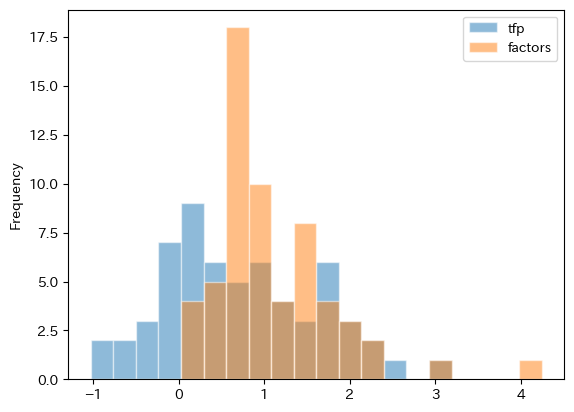

In [22]:
df_growth.plot.hist(y=['tfp','factors'], bins=20, alpha=0.5, ec='white')
pass

```{admonition} コードの説明
:class: dropdown
* ２つの列を選択することにより，同じ図に２つのヒストグラムが表示できるようになる。
* 引数`alpha`は図の透過度を指定する。0から1の間の値が指定可能で，デフォルトは1（透過なし）。
```

図から次のことがわかる。蓄積生産要素の成長率は正の値になる傾向がある。即ち，殆どの経済で蓄積生産要素による経済成長が起こっているということである。一方，全要素生産性の成長率はマイナスへの広がりがあり，成長を妨げる要因になっているようである。

次に，一人当たりGDPの成長率に対する全要素生産性の貢献度を数量化するが，まず，全要素生産性の成長率が一人当たりGDPの成長率の半分以上を占める国はデータセット全体の何％を占めるかを計算してみよう。

In [23]:
# tfpの成長率とyの成長率の比率
df_growth['tfp_y_ratio'] = 100 * df_growth['tfp'] / df_growth['y']

cond = ( df_growth.loc[:,'tfp_y_ratio']>=50 )
v = len(df_growth.loc[cond,:]) / len(df_growth)
print(f'全要素生産性の成長率が一人当たりGDPの成長率の半分以上を占める国の割合：{v:.1%}')

全要素生産性の成長率が一人当たりGDPの成長率の半分以上を占める国の割合：45.0%


```{admonition} コードの説明
:class: dropdown
`f-string`を使って`{v:.1%}`の`v`の値を表示しているが，`:.1%`の部分は値を％表示にし小数点第一位まで表示することを指定している。
```

全要素生産性の重要性を示す結果と言って良いだろう。

## 一人当たりGDPの成長率に対する寄与度

[発展会計](chap:5a-accounting)で分散分解を使い，一人当たりGDPの成長率に対する全要素生産性と蓄積生産要素の寄与度を考える。
経済の成長率は次式で与えられる。

$$
g_{y} = g_{A} + g_{\text{factors}}
$$
(eq:gy-gA-ffactors)

左辺の$g_{y}$の分散を次のように書き換えよう。

$$
\begin{aligned}
\text{Var}\left(g_{y}\right)
&=\text{Cov}\left(g_{y},g_{y}\right)\\
&=\text{Cov}\left(g_{y},g_{A} + g_{\text{factors}}\right)\\
&=\text{Cov}\left(g_{y},g_{A}\right)+\text{Cov}\left(g_{y},g_{\text{factors}}\right)
\end{aligned}
$$
(eq:Var_gyi)

一人当たりGDPの成長率の分散は全要素生産性と蓄積生産要素との共分散に分解できることを示している。
更に，両辺を$\text{Var}\left(g_{y}\right)$で割ると

$$
1=\text{全要素生産性の寄与度}+\text{蓄積生産要素の寄与度}
$$

となる。ここで、各寄与度は次のように定義される。

$$
\begin{align*}
\text{全要素生産性の寄与度}&=
\dfrac{
    \text{Cov}\left(g_{y},g_{A}\right)
    }{
    \text{Var}\left(g_{y}\right)
    } \\
\text{蓄積生産要素の寄与度}&=
\dfrac{
    \text{Cov}\left(g_{y},g_{\text{factors}}\right)
    }{
    \text{Var}\left(g_{y}\right)
    }    
\end{align*}
$$

分母と分子にある分散と共分散を計算しよう。

In [24]:
cols = ['y', 'tfp', 'factors']
vcov = df_growth[cols].cov()
vcov

,y,tfp,factors
y,1.978414,1.145627,0.832787
tfp,1.145627,0.846498,0.299129
factors,0.832787,0.299129,0.533658


対角線にある値は各変数の分散となり，その他が各変数間の共分散となる。

In [25]:
# yの分散
y_growth_var = vcov.iloc[0,0]

# 共分散
y_tfp_growth_cov = vcov.iloc[0,1]
y_factors_growth_cov = vcov.iloc[0,2]

**全要素生産性の寄与度**

In [26]:
y_tfp_growth_cov / y_growth_var

0.5790633151326813

**蓄積生産要素の寄与度**

In [27]:
y_factors_growth_cov / y_growth_var

0.4209366848673188

蓄積生産要素と全要素生産性の寄与度は概ね6対4の割合でであることが確認できる。
即ち，一人当たりGDPの成長率の半分以上は全要素生産性に起因することを意味する。
この結果は両変数の成長率のヒストグラムからも伺える。
全要素生産性の方がより幅広く変化しているようである。
いずれにしろ，蓄積生産要素と全要素生産性ともに一人当たりGDPの成長に大きく貢献していることが確認できる。

## 表の作成

数カ国だけ取り出して表としてまとめてみよう。

In [28]:
country_table = ['Japan', 'United Kingdom','United States', 'Norway',
                'Singapore','Peru','India','China']

cond = df_growth['country'].isin(country_table)

col = ['country','y','factors','tfp','tfp_y_ratio']

df_growth.loc[cond,col].set_index('country') \
         .sort_values('y', ascending=False) \
         .round(2) \
         .rename(columns={'y':'一人当たりGDPの成長率(％)',
                          'factors':'蓄積生産要素の成長率(％)',
                          'tfp':'TFPの成長率(％)',
                          'tfp_y_ratio':'TFPの寄与度(％)'})

,一人当たりGDPの成長率(％),蓄積生産要素の成長率(％),TFPの成長率(％),TFPの寄与度(％)
country,,,,
China,6.07,4.24,1.83,30.08
India,5.17,3.05,2.12,40.96
Peru,2.42,1.45,0.97,40.16
Singapore,1.72,2.06,-0.34,-19.85
United States,1.34,0.64,0.70,52.08
United Kingdom,0.77,0.61,0.16,21.29
Japan,0.62,0.27,0.36,57.12
Norway,0.61,0.72,-0.12,-19.56


右端の全要素生産性（TFP）の寄与度は，上で計算した`tfp_y_ratio`を使っており，一人当たりGDPの成長率のうち何％がTFPによるものかを示している。
この表から次の事が分かる。
* 全要素生産性の成長率が負の経済もあるため，TFPの寄与度が負になっている場合もある。その場合，蓄積生産要素の寄与度`100`％以上になる。
* 日本の全要素生産性の寄与度は非常に大きい。

このデータは1999~2019年のデータであり，それ以前ではどうだったのかを含めて，次節では年代を区切って日本の経済成長を考察してみることにする。

## 日本

日本の年代別に成長率を考えてみよう。まず次の関数を作成する。

In [29]:
def jp_growth_decomposition(start, end):
    """引数：
        start（int）: 開始年
        end（int）: 最終年
        
       返り値：次の変数の成長率とTFPの寄与度からなるリスト
                一人当たりGDP
                一人当たり物的資本
                平均労働時間
                人的資本
                全要素生産性（TFP）"""

    var_lst = ['y', 'k', 'avh', 'hc']
        
    g_lst = []
    
    # ========== var_listの変数の平均成長率を計算しg_listに追加する ==========
    for v in var_lst:
        
        g = calculate_growth(country='Japan', var=v, start=start, end=end)
        g_lst.append(g)
        
    # ========== 蓄積生産要素の平均成長率を計算しg_listに追加する ==========
    factors = (1/3) * g_lst[1] + (1-1/3) * ( g_lst[2]+g_lst[3] )
    g_lst.append(factors)
    
    # ========== 全要素生産性の平均成長率を計算しg_listに追加する ==========
    tfp = g_lst[0] - factors
    g_lst.append(tfp)

    # ========== 全要素生産性の寄与度を計算しg_listに追加する ==========
    tfp_contribution = 100 * tfp / g_lst[0]
    g_lst.append(tfp_contribution)
    
    return g_lst

この関数を使って`DataFrame`を作成する。

In [30]:
dic = {}                                          # 1

yr_lst = ['1950s','1960s','1970s',                # 2
           '1980s','1990s','2000s','2010s']

for yr in yr_lst:                                 # 3
    start = int(yr[:4])                           # 4
    end = start+9                                 # 5
    dic[yr] = jp_growth_decomposition(start, end) # 6


idx = ['y_growth','k_growth',               # 7
       'avh_growth','hc_growth','factors_growth',
       'tfp_growth','tfp_contribution']

df_jp = pd.DataFrame(dic, index=idx)              # 8
df_jp

,1950s,1960s,1970s,1980s,1990s,2000s,2010s
y_growth,5.655810,8.226415,3.756609,3.573876,0.900981,0.219960,0.307585
k_growth,NaN,10.634742,8.042348,5.030082,3.975190,1.526388,0.116887
avh_growth,0.668095,-0.133169,-0.340568,-0.067613,-1.017606,-0.619595,-0.564995
hc_growth,1.257113,0.804446,0.708988,0.558892,0.515371,0.442203,0.302941
factors_growth,NaN,3.992432,2.926396,2.004213,0.990240,0.390535,-0.135740
tfp_growth,NaN,4.233982,0.830212,1.569663,-0.089259,-0.170575,0.443326
tfp_contribution,NaN,51.468135,22.100051,43.920461,-9.906831,-77.547931,144.130973


````{admonition} コードの説明
:class: dropdown

1~6のコードは次のコードを`for`ループとして書いている。
```
dic = {'1950s':jp_growth_decomposition(1950,1959),
       '1960s':jp_growth_decomposition(1960,1969),
       '1970s':jp_growth_decomposition(1970,1979),
       '1980s':jp_growth_decomposition(1980,1989),
       '1990s':jp_growth_decomposition(1990,1999),
       '2000s':jp_growth_decomposition(2000,2010),
       '2010s':jp_growth_decomposition(2010,2019)}

```
1. 空の辞書`dic`を作成する。
2. `dic`のキーになる値のリストを作成する。
3. `yr_lst`に対しての`for`ループ。
4. 関数`jp_growth_decomposition()`の引数として使用する開始年を作成する。
    * 右辺の`yr`は5つの文字からなる文字列であり，`yr[:4]`は最初の4文字を抽出する。それを整数に変換するために`int()`を使っている。
    * 右辺の開始年を変数`start`に割り当てる。
5. 関数`jp_growth_decomposition()`の引数として使用する最終年を作成する。
    * 右辺では`start`の9年後を最終年としている。
    * 右辺の最終年を変数`end`に割り当てる。
6. `dic`のキー`yr`に対応する値として`jp_growth_decomposition(start,end)`の返り値を`設定する。
7. (8)で`DataFrame`を作成するが，その行ラベルに使うリストを作成する。
8. `dic`を使い`DataFrame`を作成する。
````

値を確認するだけであればこのままでも良いが，棒グラフを作成するために列と行を入れ替えることにする。`df_jp`のメソッド`.transpose()`を使う。

In [31]:
df_jp = df_jp.transpose()
df_jp

,y_growth,k_growth,avh_growth,hc_growth,factors_growth,tfp_growth,tfp_contribution
1950s,5.655810,NaN,0.668095,1.257113,NaN,NaN,NaN
1960s,8.226415,10.634742,-0.133169,0.804446,3.992432,4.233982,51.468135
1970s,3.756609,8.042348,-0.340568,0.708988,2.926396,0.830212,22.100051
1980s,3.573876,5.030082,-0.067613,0.558892,2.004213,1.569663,43.920461
1990s,0.900981,3.975190,-1.017606,0.515371,0.990240,-0.089259,-9.906831
2000s,0.219960,1.526388,-0.619595,0.442203,0.390535,-0.170575,-77.547931
2010s,0.307585,0.116887,-0.564995,0.302941,-0.135740,0.443326,144.130973


1950年代に欠損値があるが，そのまま議論を進めよう。まず一人当たりGDP成長率`gdp_pc_growth`を棒グラフとして表示してみよう。表示したい列を選択し，引数に`kind='bar'`を選択するだけである。

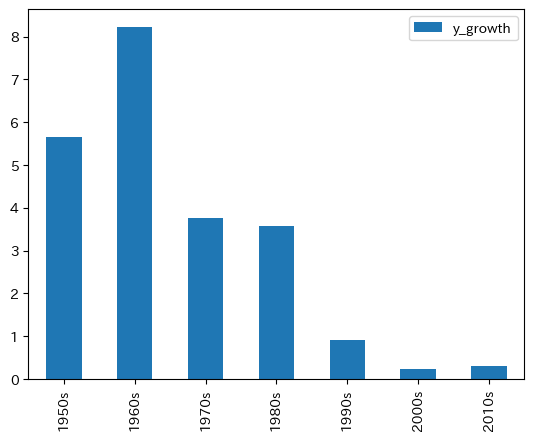

In [32]:
df_jp.plot.bar(y='y_growth')
pass

1960年代をピークに成長率は下降線をたどっている。

次にヒストグラムに異なる変数を並べて表示してみる。この場合も、表示したい変数を先に選び`kind='bar'`を指定するだけである。

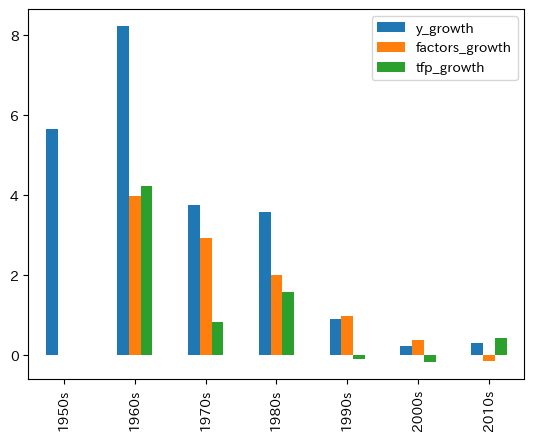

In [33]:
cols = ['y_growth', 'factors_growth', 'tfp_growth']
df_jp.plot.bar(y=cols)
pass

以下では，全要素生産性と蓄積生産要素の成長率に焦点を当て議論を進めるために`dropna()`を使って1950年代のデータは削除する。

In [34]:
df_jp = df_jp.dropna()

上の棒グラフで，引数`stacked=True`を設定すると棒を積み重ねて表示することができる。

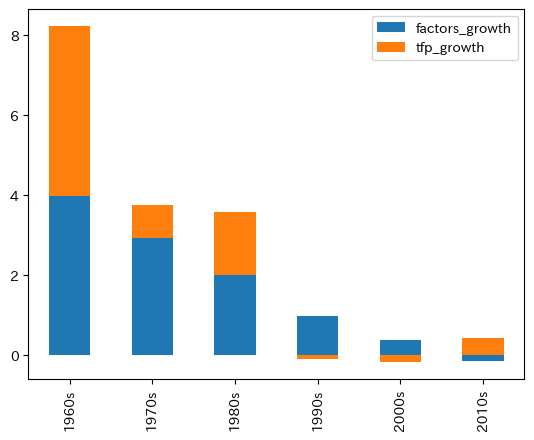

In [35]:
df_jp.plot.bar(y=cols[1:], stacked=True)
pass

次のグラフでは，一人当たりGDPの線グラフと一緒に表示している。

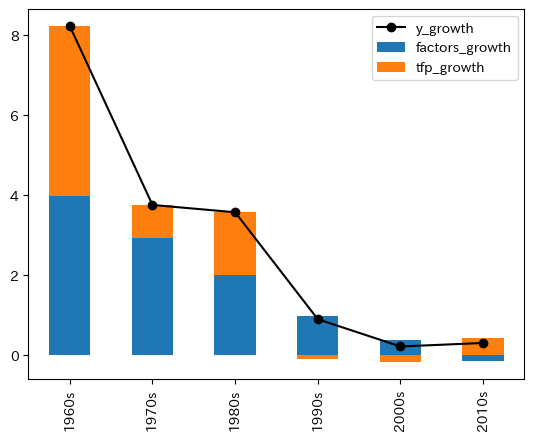

In [36]:
ax_ = df_jp.plot(y=cols[0], marker='o',color='k', legend=True)
df_jp.plot.bar(y=cols[1:], stacked=True, legend=True, ax=ax_)
pass

1990年代に入ると，それ以前と比べて全要素生産性の成長率の下落が著しく，一人当たりGDPの成長率に大きく影響している。「失われた10年」の原因と主張する研究者もいる。